# Municipality analysis

## Importing libraries

In [1]:
#standard libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

# Deep learning libraries
import torch 
import torch.nn as nn
import torch.optim as optim
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.utils import Bunch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from torch.utils.data import DataLoader, TensorDataset

# import modules from utils 

import sys
import os

# Dynamically add the 'utils' folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../source/')))

# Now, you can import the functions
from utils.autoencoder import Autoencoder

## Importing Municipal Solar Types

In [61]:
df = pd.read_csv("../../data/cleaned_data/Municipal_solar_types.csv")

In [62]:
df.head()

,Unnamed: 0,mun_name,canton_abr,pv_pot,pv_pot_reco,fpv_pot,fpv_pot_reco,roof_area,facade_area,total_power,...,Scenario3_RoofsFacades_PotentialSolarElectricity_Month10_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month11_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month12_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,mun_id,municipality_type,urban_typo
0,0,Sévaz,FR,4.670673e+06,4.180890e+06,1.929158e+06,1.425327e+06,39036.054397,33832.332298,3693.98,...,0.87,0.50,0.35,13.55,0.86,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2043,7,Centrally located rural municipality (32)
1,1,Onnens (VD),VD,1.305776e+07,1.177943e+07,3.235058e+06,2.103798e+06,112876.590943,63996.552432,8615.12,...,1.02,0.57,0.42,15.85,1.54,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,5565,0,Low-density peri-urban municipality (23)
2,2,Cressier (NE),NE,1.679586e+07,1.422929e+07,7.305761e+06,4.541674e+06,146427.208998,153540.786324,9229.40,...,1.86,1.04,0.79,26.41,4.48,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6452,0,Medium-density peri-urban municipality (22)
3,3,Clarmont,VD,1.777467e+06,1.489369e+06,9.465443e+05,6.455402e+05,13871.650234,16173.060807,986.84,...,0.21,0.12,0.10,2.79,0.46,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,5629,7,Low-density peri-urban municipality (23)
4,4,Giornico,TI,1.495146e+07,5.614214e+06,5.010771e+06,2.016368e+06,150042.723782,137640.972544,3393.20,...,0.66,0.36,0.28,8.37,1.72,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,5073,0,Peripheral rural municipality (33)


In [63]:
df.columns

Index(['Unnamed: 0', 'mun_name', 'canton_abr', 'pv_pot', 'pv_pot_reco',
       'fpv_pot', 'fpv_pot_reco', 'roof_area', 'facade_area', 'total_power',
       'total_energy', 'initial_power', 'total_potential',
       'recommended_potential', 'achieved_rp', 'achieved_tp', 'Canton',
       'Country', 'Scenario1_RoofsOnly_PotentialSolarElectricity_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month01_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month02_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month03_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month04_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month05_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month06_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month07_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month08_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month09_GWh',
       'Scenario1_RoofsOnly_Potential

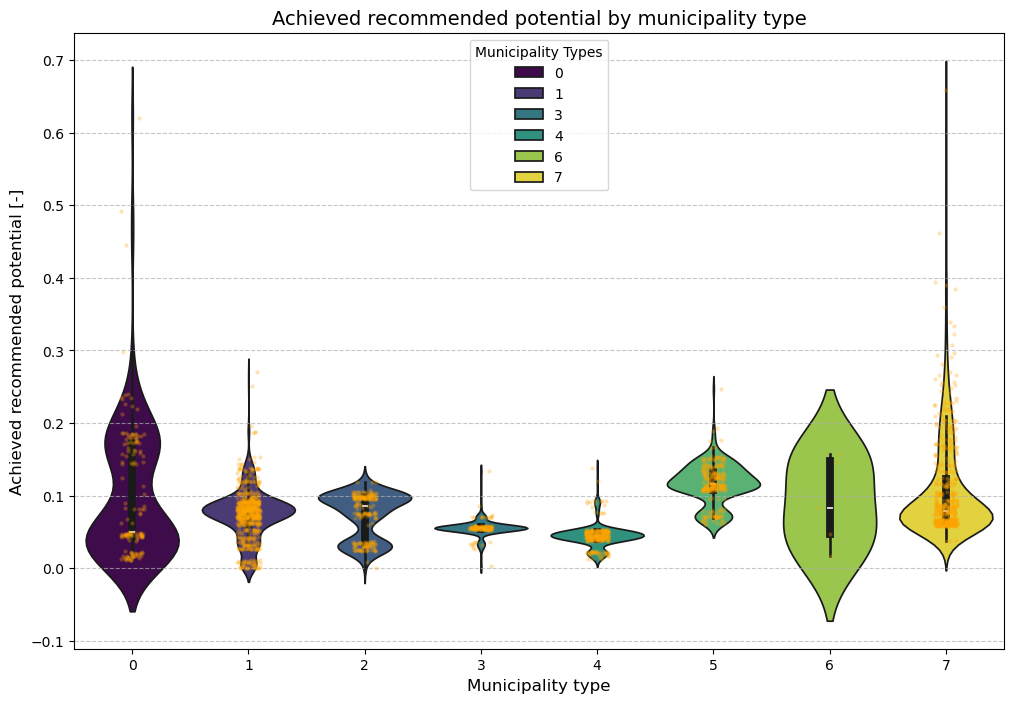

In [64]:
plt.figure(figsize=(12, 8))

# Create the violin plot
sns.violinplot(x="municipality_type", y="achieved_rp", hue="municipality_type", data=df, palette="viridis")

# Overlay the swarmplot for individual data points
#sns.swarmplot(x="type", y="achieved_rp", data=Swiss_solar_potential, color="black", size=3, alpha=0.7)
sns.stripplot(x="municipality_type", y="achieved_rp", data=df, color="orange", size=3, alpha=0.3, jitter=True)


# Title and labels
plt.title("Achieved recommended potential by municipality type", fontsize=14)
plt.xlabel("Municipality type", fontsize=12)
plt.ylabel("Achieved recommended potential [-]", fontsize=12)
plt.legend(title="Municipality Types")

# Add grid
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the plot
plt.show()

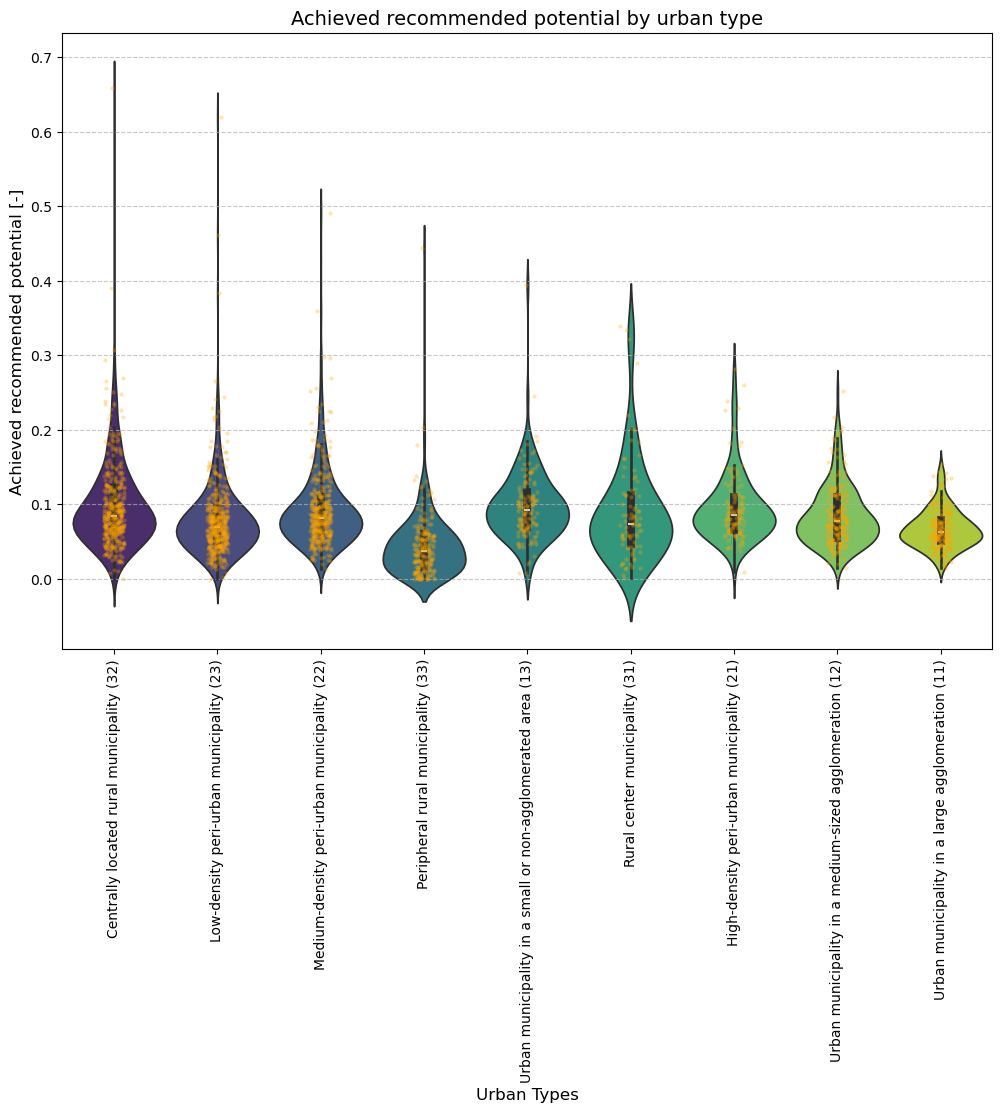

In [104]:
plt.figure(figsize=(12, 8))

# Create the violin plot
sns.violinplot(x="urban_typo", y="achieved_rp", hue="urban_typo", data=df, palette="viridis")

# Overlay the swarmplot for individual data points
#sns.swarmplot(x="type", y="achieved_rp", data=Swiss_solar_potential, color="black", size=3, alpha=0.7)
sns.stripplot(x="urban_typo", y="achieved_rp", data=df, color="orange", size=3, alpha=0.3, jitter=True)


# Title and labels
plt.title("Achieved recommended potential by urban type", fontsize=14)
plt.xlabel("Urban Types", fontsize=12)
plt.ylabel("Achieved recommended potential [-]", fontsize=12)
#plt.legend(title="Urban Types")
plt.xticks(rotation=90)

# Add grid
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the plot
plt.show()

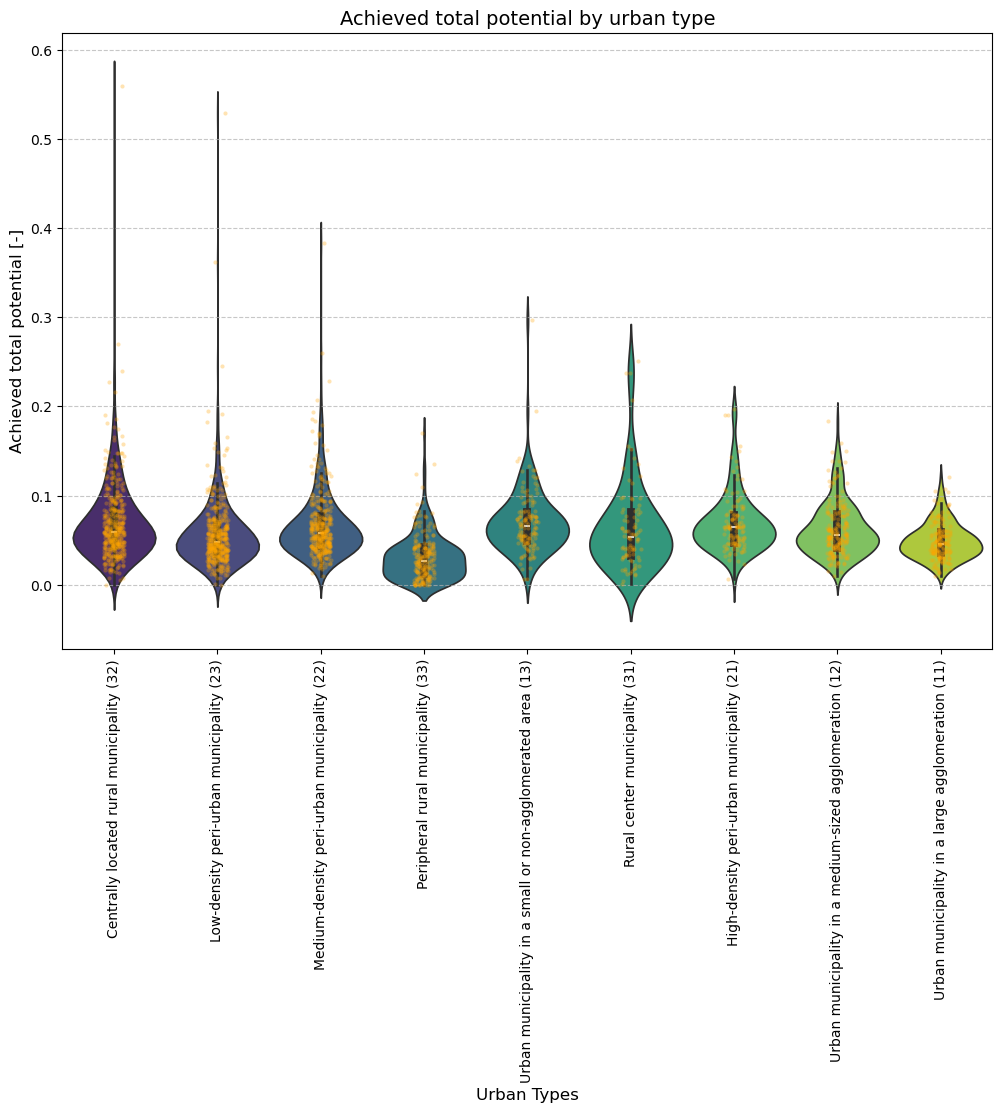

In [ ]:
plt.figure(figsize=(12, 8))

# Create the violin plot
sns.violinplot(x="urban_typo", y="achieved_tp", hue="urban_typo", data=df, palette="viridis")

# Overlay the swarmplot for individual data points
#sns.swarmplot(x="type", y="achieved_rp", data=Swiss_solar_potential, color="black", size=3, alpha=0.7)
sns.stripplot(x="urban_typo", y="achieved_tp", data=df, color="orange", size=3, alpha=0.3, jitter=True)


# Title and labels
plt.title("Achieved total potential by predefined urban type", fontsize=14)
plt.xlabel("Urban Types", fontsize=12)
plt.ylabel("Achieved total potential [-]", fontsize=12)
#plt.legend(title="Urban Types")
plt.xticks(rotation=90)

# Add grid
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the plot
plt.show()

In [67]:
Covariates = pd.read_csv("../../data/cleaned_data/Covariates_types.csv")

In [79]:

Covariates.drop(columns=["Unnamed: 0"], inplace=True)
Covariates.head()

,population,yes_votes_for_climate_and_innovation_act,no_votes_for_climate_and_innovation_act,age_group_0_to_19,age_group_20_to_64,age_group_65_and_older,number_of_private_households,housing_and_infrastructure_area_percentage,total_employment,employment_in_primary_sector,...,region_alpes,region_black_forest_or_jura_souabe,region_jura,region_middle_land_or_rhein,region_non_mountainous,language_french,language_german,language_italian,language_romansh,municipality_type
0,-0.164167,0.489165,-0.489165,-0.207587,0.645798,-0.307013,-0.279839,-0.120694,-0.150143,-0.427424,...,0,0,0,1,0,0,1,0,0,7
1,0.647875,0.743894,-0.743894,-0.094790,0.480800,-0.274049,-0.445494,0.304738,0.318395,-0.925601,...,0,0,0,1,0,0,1,0,0,0
2,0.110975,1.002930,-1.002930,0.941221,-0.097560,-0.645999,-0.409128,-0.046973,-0.108772,-0.762045,...,0,0,0,1,0,0,1,0,0,0
3,-0.016428,0.569783,-0.569783,0.506756,-0.100980,-0.312920,-0.385071,-0.093483,-0.108265,-0.409980,...,0,0,0,1,0,0,1,0,0,7
4,-0.017250,0.597685,-0.597685,0.340900,0.474013,-0.600710,-0.382924,-0.060566,-0.075212,-0.847127,...,0,0,0,1,0,0,1,0,0,0


## Type 0 - rich_young_tertiary_urban_municipalities

In [80]:
Solar_type_0 = df[df.municipality_type==0]


In [81]:
Solar_type_0.head()

,Unnamed: 0,mun_name,canton_abr,pv_pot,pv_pot_reco,fpv_pot,fpv_pot_reco,roof_area,facade_area,total_power,...,Scenario3_RoofsFacades_PotentialSolarElectricity_Month10_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month11_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month12_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,mun_id,municipality_type,urban_typo
1,1,Onnens (VD),VD,1.305776e+07,1.177943e+07,3.235058e+06,2.103798e+06,112876.590943,63996.552432,8615.12,...,1.02,0.57,0.42,15.85,1.54,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,5565,0,Low-density peri-urban municipality (23)
2,2,Cressier (NE),NE,1.679586e+07,1.422929e+07,7.305761e+06,4.541674e+06,146427.208998,153540.786324,9229.40,...,1.86,1.04,0.79,26.41,4.48,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6452,0,Medium-density peri-urban municipality (22)
4,4,Giornico,TI,1.495146e+07,5.614214e+06,5.010771e+06,2.016368e+06,150042.723782,137640.972544,3393.20,...,0.66,0.36,0.28,8.37,1.72,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,5073,0,Peripheral rural municipality (33)
13,13,Büetigen,BE,6.891774e+06,5.320273e+06,3.141309e+06,1.657364e+06,64536.389127,68400.075270,2082.12,...,0.79,0.45,0.30,10.55,2.14,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,382,0,Medium-density peri-urban municipality (22)
32,32,Cadenazzo,TI,2.574127e+07,2.276363e+07,1.119852e+07,6.653444e+06,238938.436170,244211.254056,7038.90,...,2.92,1.28,0.61,42.19,5.10,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,5003,0,High-density peri-urban municipality (21)


<Axes: xlabel='achieved_rp', ylabel='Count'>

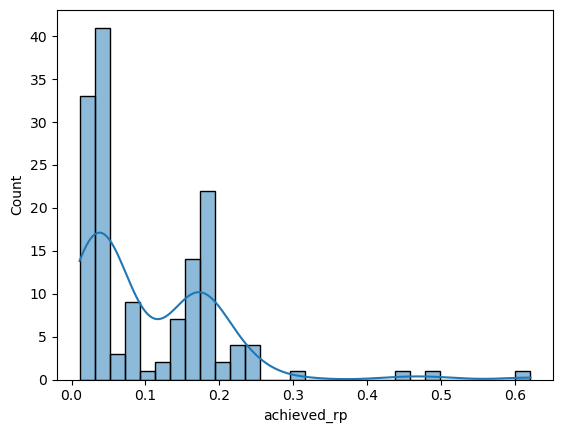

In [82]:
sns.histplot(x="achieved_rp", data=Solar_type_0, bins=30, kde=True)

In [83]:
Covariates_0 = Covariates[Covariates.municipality_type==0]

In [84]:
Covariates_0.head()

,population,yes_votes_for_climate_and_innovation_act,no_votes_for_climate_and_innovation_act,age_group_0_to_19,age_group_20_to_64,age_group_65_and_older,number_of_private_households,housing_and_infrastructure_area_percentage,total_employment,employment_in_primary_sector,...,region_alpes,region_black_forest_or_jura_souabe,region_jura,region_middle_land_or_rhein,region_non_mountainous,language_french,language_german,language_italian,language_romansh,municipality_type
1,0.647875,0.743894,-0.743894,-0.094790,0.480800,-0.274049,-0.445494,0.304738,0.318395,-0.925601,...,0,0,0,1,0,0,1,0,0,0
2,0.110975,1.002930,-1.002930,0.941221,-0.097560,-0.645999,-0.409128,-0.046973,-0.108772,-0.762045,...,0,0,0,1,0,0,1,0,0,0
4,-0.017250,0.597685,-0.597685,0.340900,0.474013,-0.600710,-0.382924,-0.060566,-0.075212,-0.847127,...,0,0,0,1,0,0,1,0,0,0
13,0.084433,0.725532,-0.725532,0.892632,-1.207613,0.190227,-0.405292,0.108878,-0.087941,-0.896676,...,0,0,0,1,0,0,1,0,0,0
32,0.009143,0.233875,-0.233875,0.184248,-0.551212,0.256671,-0.387527,-0.029786,-0.048450,-0.947287,...,0,0,0,1,0,0,1,0,0,0


In [85]:
correlation = Solar_type_0['achieved_rp'].corr(Covariates_0['population'], method='spearman')
correlation

0.2148535181668322

In [88]:
df_0 = Covariates_0.copy()
df_0["achieved_rp"]=Solar_type_0['achieved_rp']

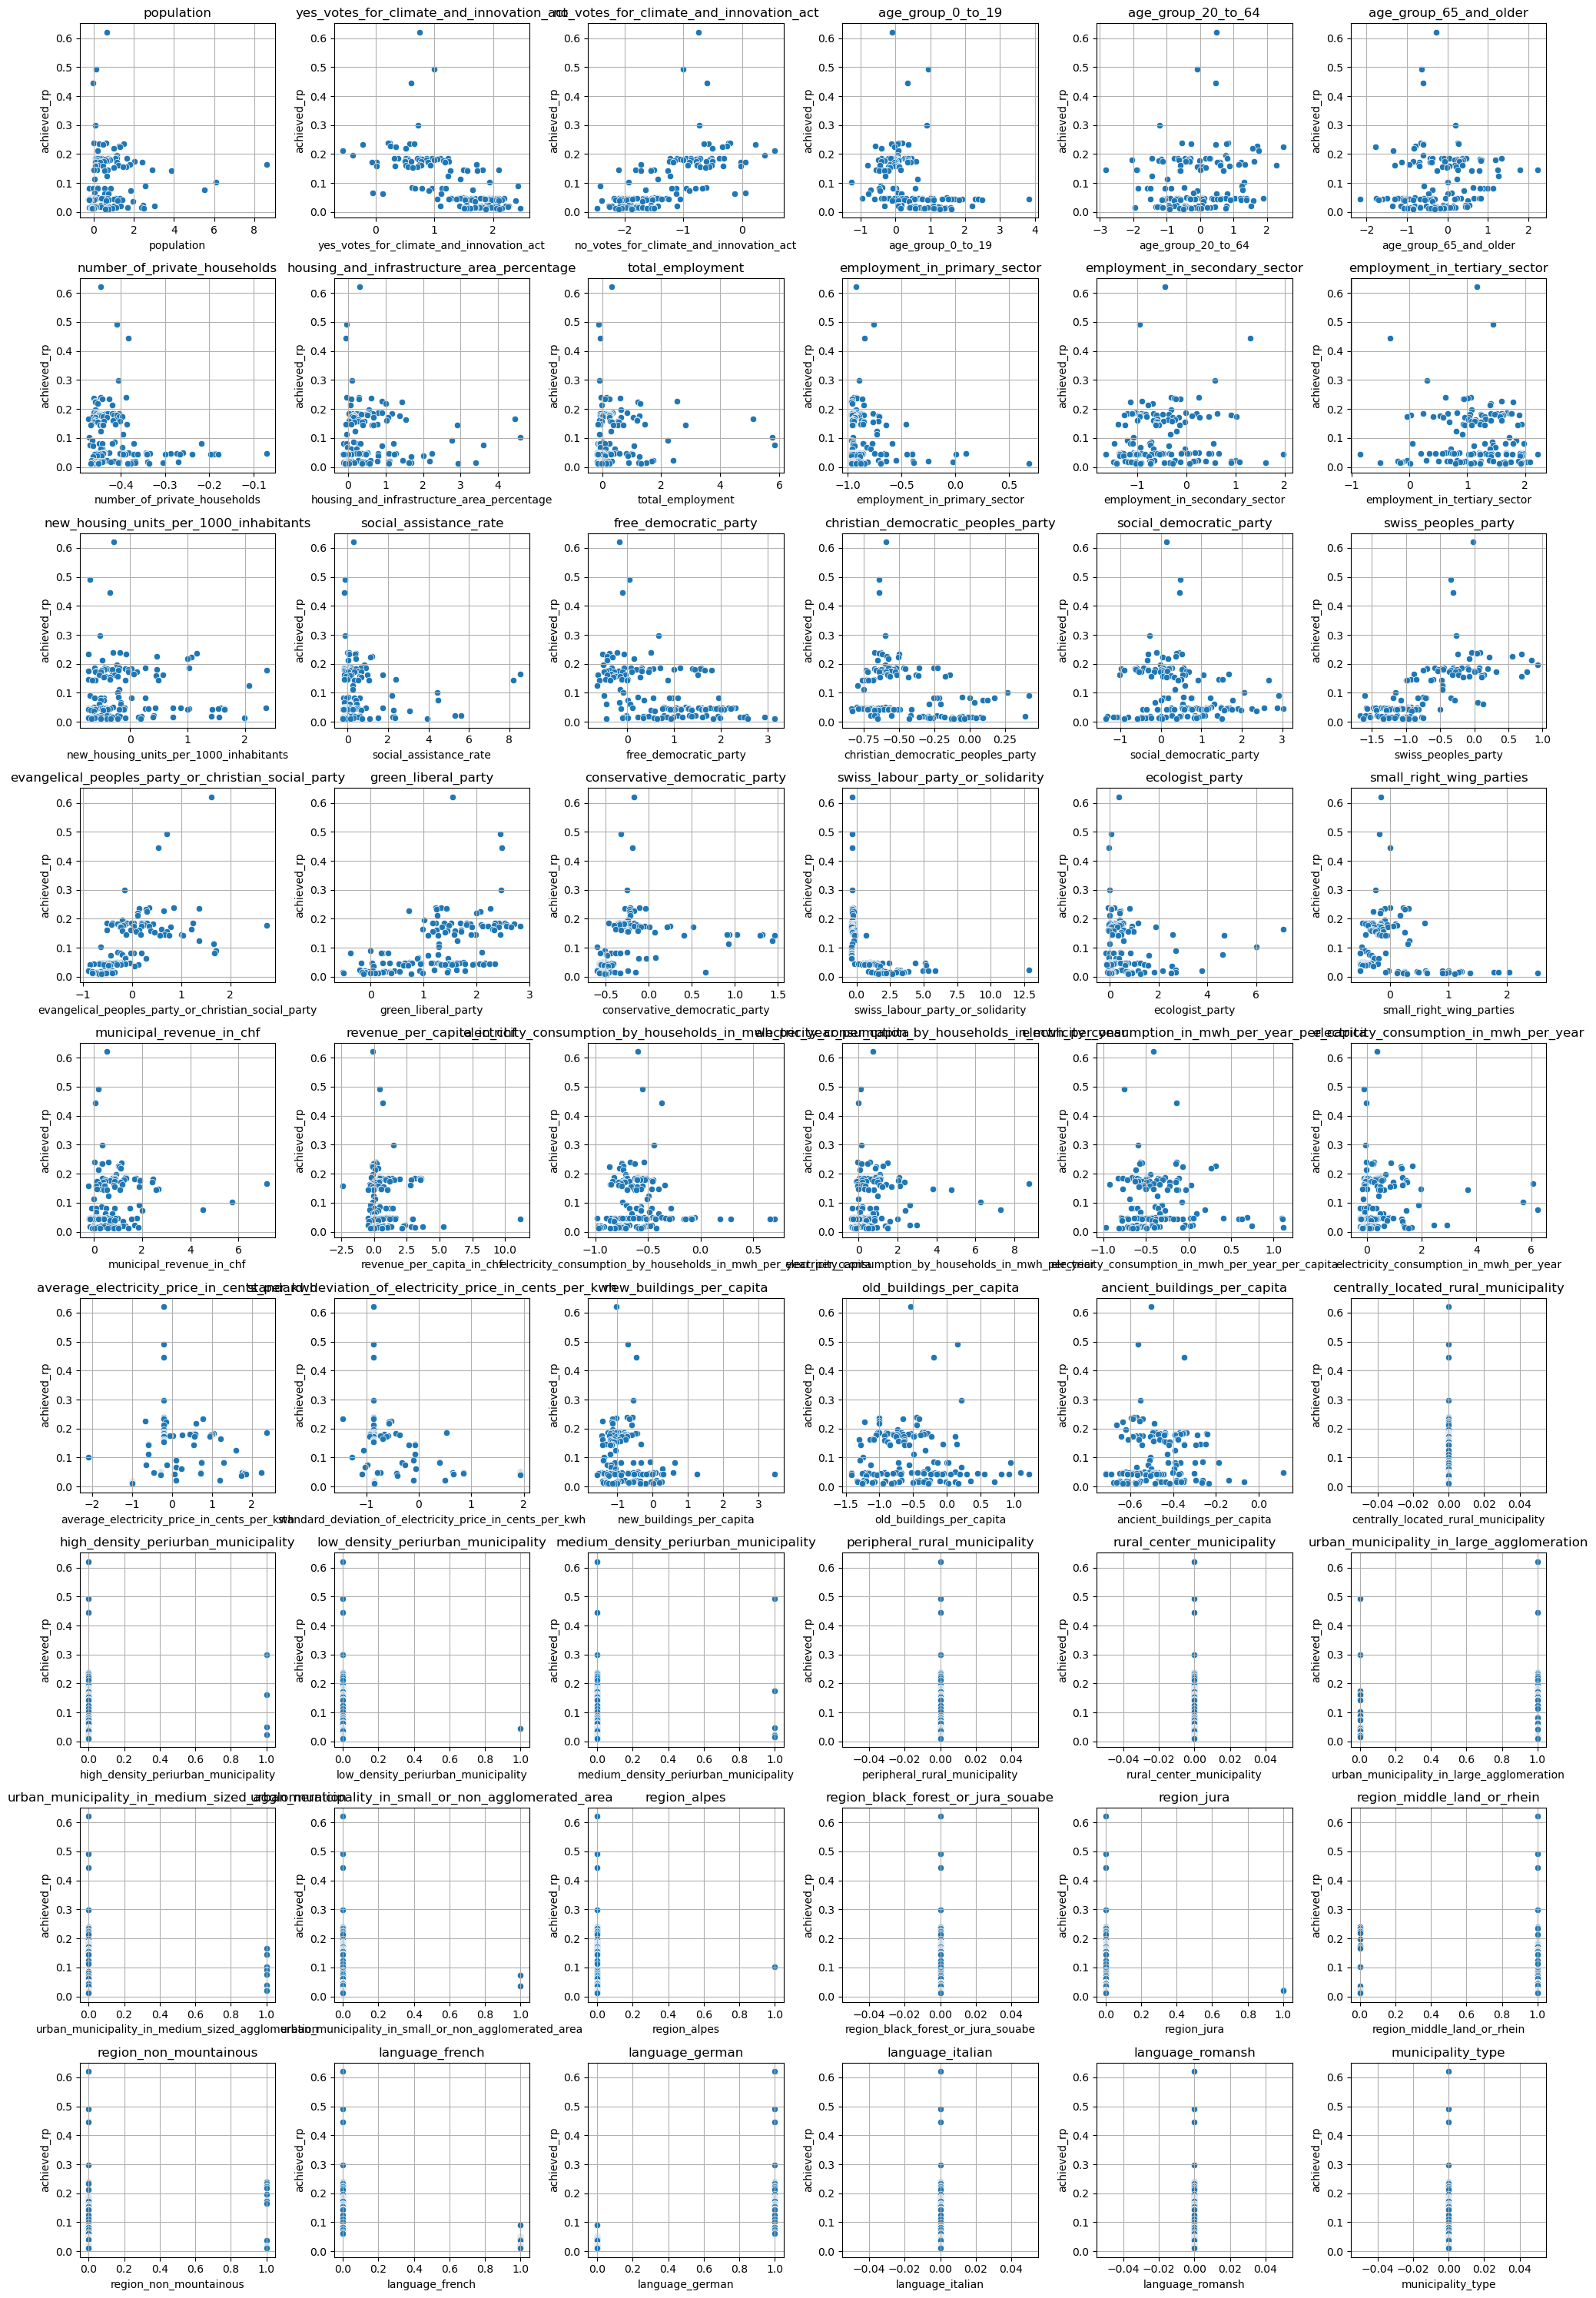

In [90]:
# Create subplots with 9 rows and 6 columns
fig, axes = plt.subplots(9, 6, figsize=(20, 30))  # Adjust size as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over columns and plot scatterplots
for i, col in enumerate(df_0.columns.drop("achieved_rp")):
    if pd.api.types.is_numeric_dtype(df_0[col]):  # Check for numeric data
        sns.scatterplot(x=col, y="achieved_rp", data=df_0, ax=axes[i])
        axes[i].set_title(col)
        axes[i].grid()
    else:
        axes[i].axis('off')  # Turn off unused subplots

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


## Type 1 - jura_small_urban_christain_social_party_new_houses

In [91]:
Solar_type_1 = df[df.municipality_type==1]
Solar_type_1.head()

,Unnamed: 0,mun_name,canton_abr,pv_pot,pv_pot_reco,fpv_pot,fpv_pot_reco,roof_area,facade_area,total_power,...,Scenario3_RoofsFacades_PotentialSolarElectricity_Month10_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month11_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month12_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,mun_id,municipality_type,urban_typo
19,19,Berken,BE,9.852464e+05,6.186356e+05,3.402420e+05,1.976830e+05,9311.943139,7395.741916,220.22,...,0.12,0.07,0.04,1.72,0.20,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,972,1,Centrally located rural municipality (32)
27,27,Vallon,FR,3.479095e+06,2.699811e+06,1.681722e+06,1.129915e+06,30196.468524,30845.122353,961.94,...,0.49,0.29,0.21,6.79,1.00,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2045,1,Centrally located rural municipality (32)
70,70,Bargen (SH),SH,3.075847e+06,2.023587e+06,1.419284e+06,7.915434e+05,31169.655285,31099.613710,551.05,...,0.34,0.17,0.13,4.22,0.86,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2931,1,Low-density peri-urban municipality (23)
82,82,Werthenstein,LU,1.990189e+07,1.434767e+07,9.127027e+06,4.968103e+06,197591.186826,200267.865573,3613.41,...,2.36,1.39,1.06,30.58,5.60,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,1009,1,Centrally located rural municipality (32)
83,83,Rothenburg,LU,4.782254e+07,3.918075e+07,2.572997e+07,1.534309e+07,454093.611755,523238.398919,10191.33,...,6.13,3.66,2.95,83.05,14.78,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,1040,1,Urban municipality in a medium-sized agglomera...


<Axes: xlabel='achieved_rp', ylabel='Count'>

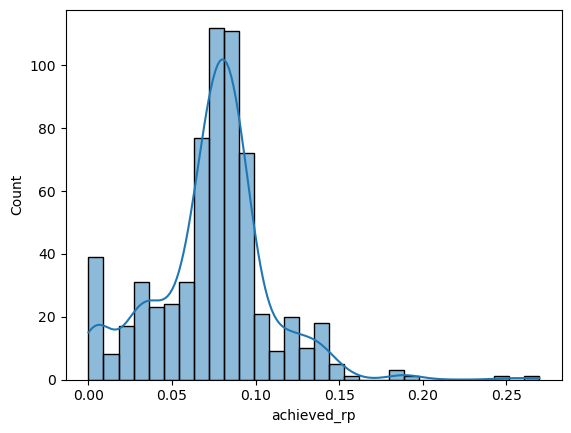

In [92]:
sns.histplot(x="achieved_rp", data=Solar_type_1, bins=30, kde=True)

In [93]:
Covariates_1 = Covariates[Covariates.municipality_type==1]
Covariates_1.head()

,population,yes_votes_for_climate_and_innovation_act,no_votes_for_climate_and_innovation_act,age_group_0_to_19,age_group_20_to_64,age_group_65_and_older,number_of_private_households,housing_and_infrastructure_area_percentage,total_employment,employment_in_primary_sector,...,region_alpes,region_black_forest_or_jura_souabe,region_jura,region_middle_land_or_rhein,region_non_mountainous,language_french,language_german,language_italian,language_romansh,municipality_type
19,-0.028615,0.402831,-0.402831,-0.076554,0.614577,-0.384247,-0.372459,0.035809,-0.097850,-0.940894,...,0,0,0,0,1,0,1,0,0,1
27,-0.217102,0.489920,-0.489920,-0.784027,0.443652,0.277188,-0.149930,-0.132467,-0.131916,-0.834938,...,0,0,0,0,1,0,1,0,0,1
70,0.299088,-0.703166,0.703166,0.114617,1.124206,-0.896661,-0.427116,0.140395,0.271888,-0.869698,...,0,0,0,0,1,0,1,0,0,1
82,0.571089,-0.366443,0.366443,-0.275071,0.130250,0.115540,-0.443051,0.116852,0.324109,-0.815077,...,1,0,0,0,0,0,1,0,0,1
83,0.648099,0.186609,-0.186609,-0.288145,0.291997,0.009029,-0.444934,0.288665,0.183359,-0.896935,...,0,0,0,1,0,0,1,0,0,1


In [94]:
df_1 = Covariates_1.copy()
df_1["achieved_rp"]=Solar_type_1['achieved_rp']

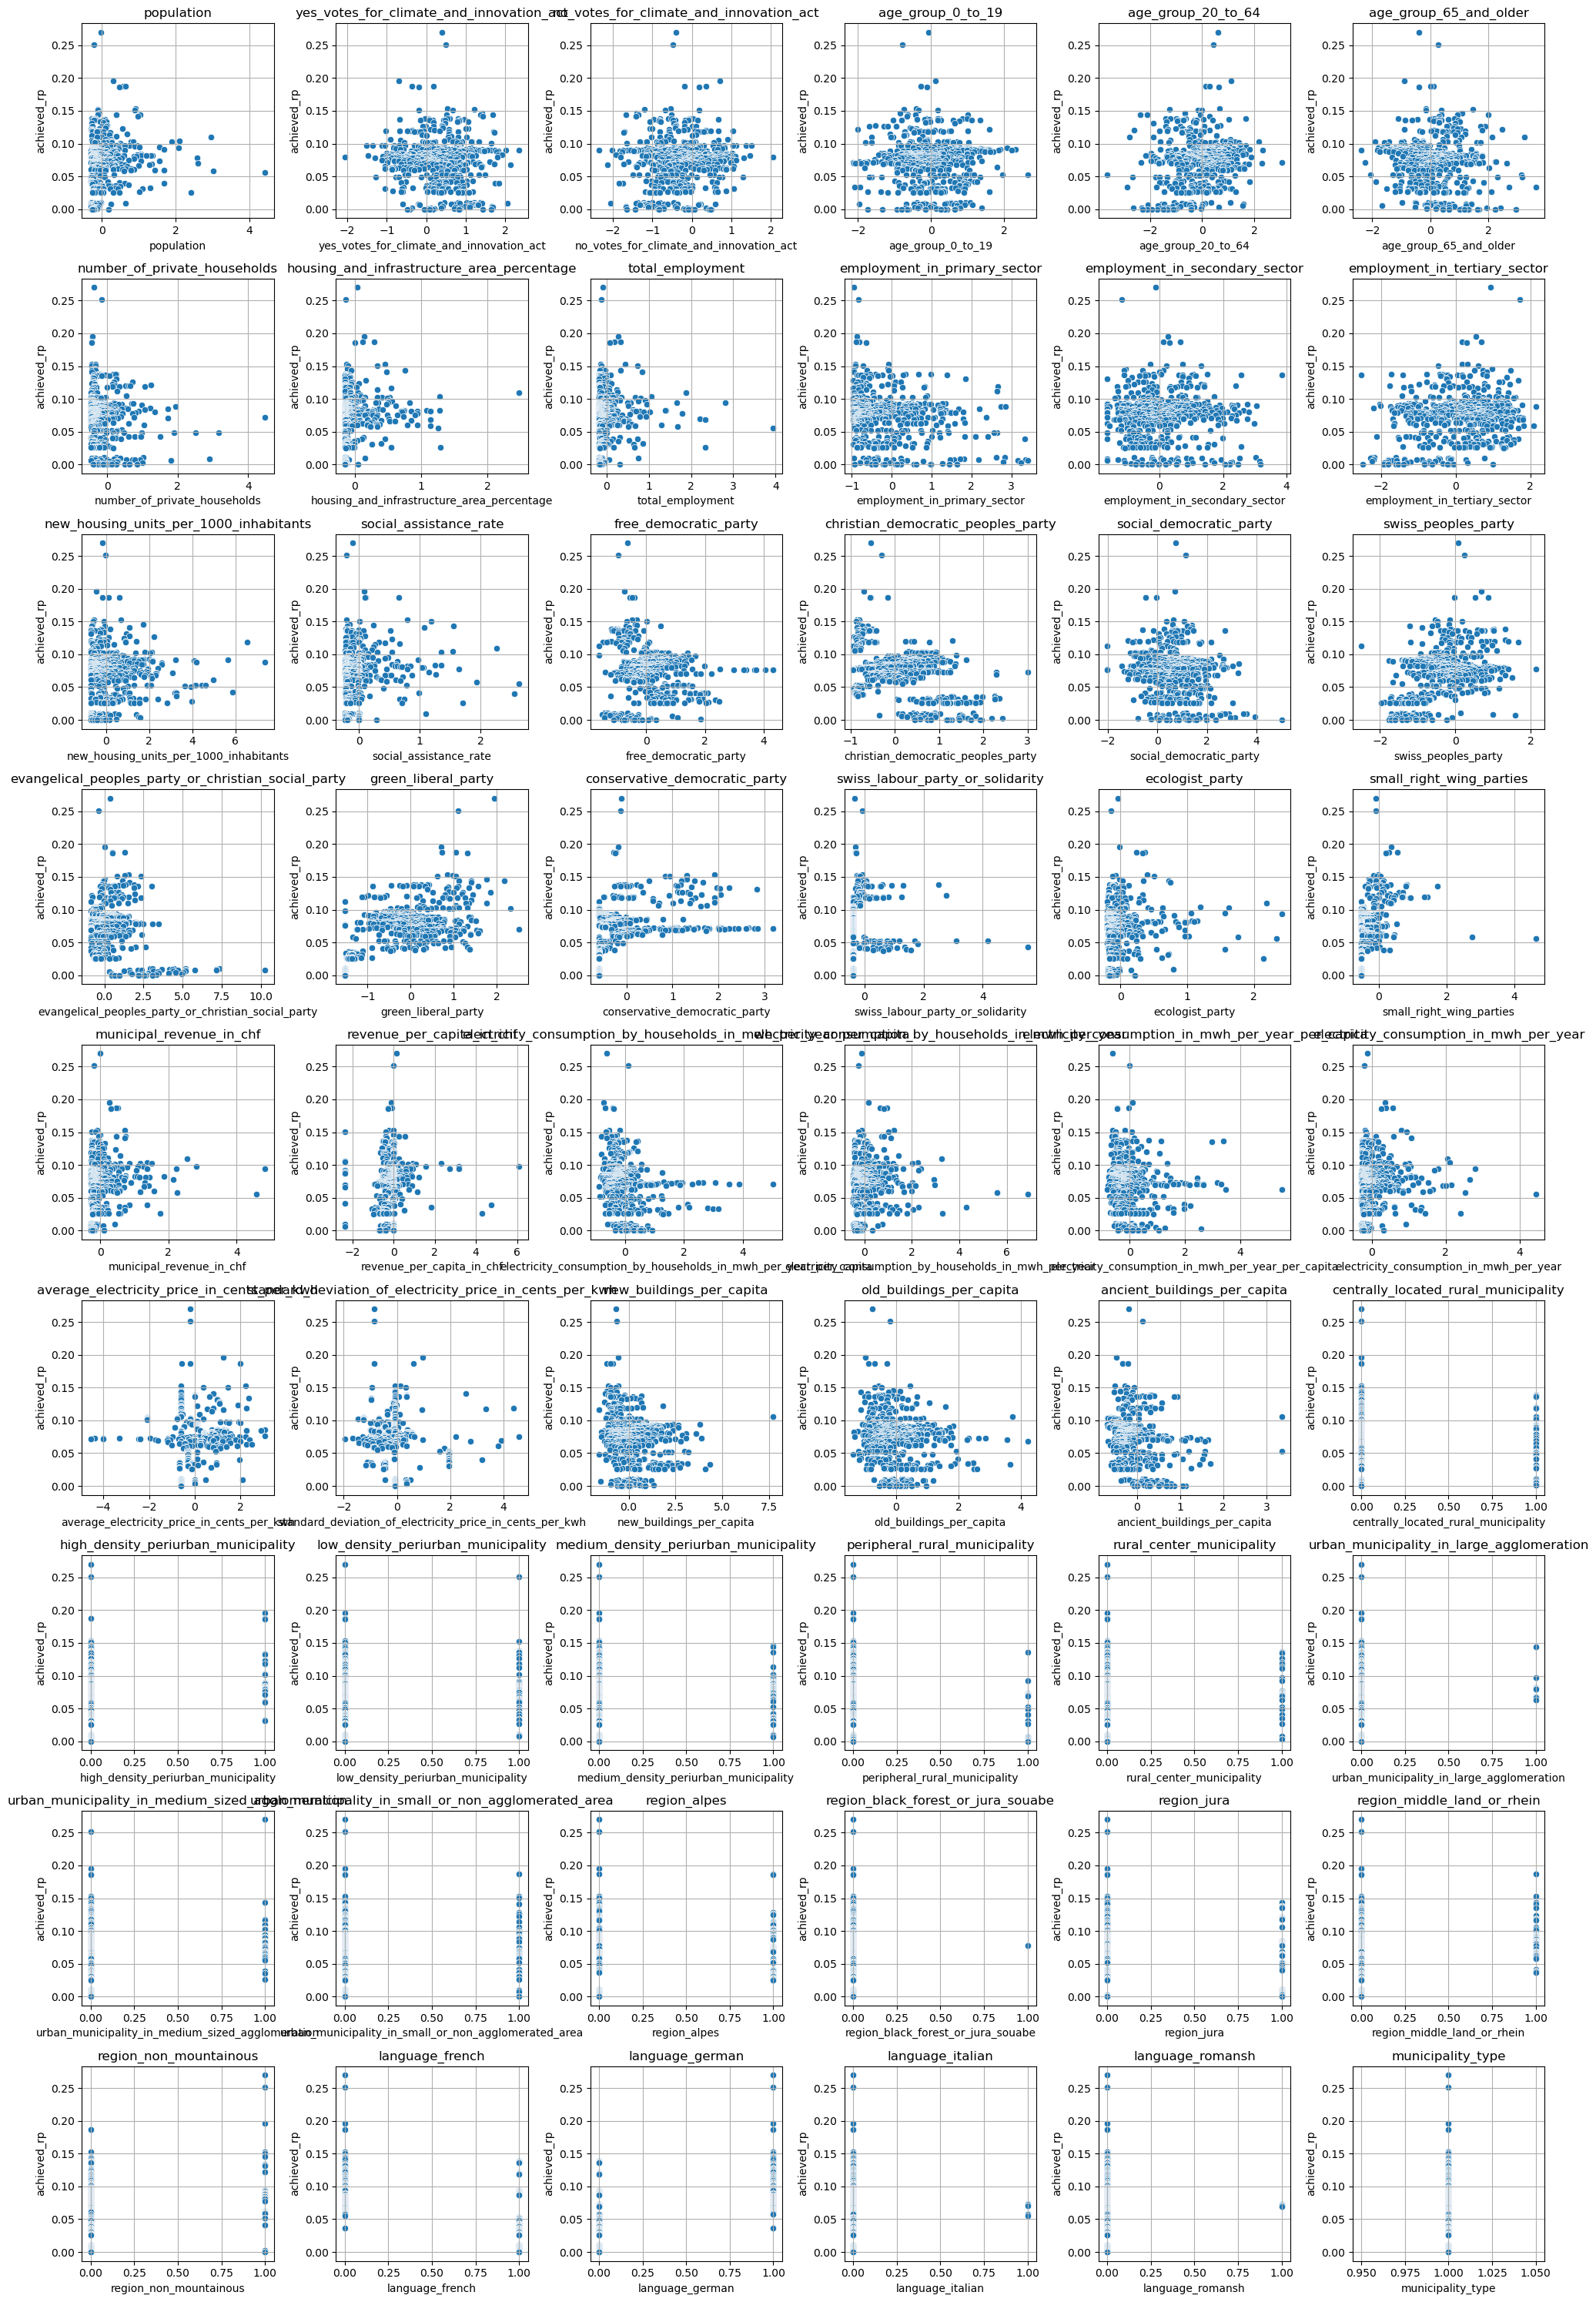

In [95]:
# Create subplots with 9 rows and 6 columns
fig, axes = plt.subplots(9, 6, figsize=(20, 30))  # Adjust size as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over columns and plot scatterplots
for i, col in enumerate(df_1.columns.drop("achieved_rp")):
    if pd.api.types.is_numeric_dtype(df_1[col]):  # Check for numeric data
        sns.scatterplot(x=col, y="achieved_rp", data=df_1, ax=axes[i])
        axes[i].set_title(col)
        axes[i].grid()
    else:
        axes[i].axis('off')  # Turn off unused subplots

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


## Type 2 - romansh_rural_christian-party_no_to_C&I

In [97]:
Solar_type_2 = df[df.municipality_type==2]
Solar_type_2.head()

,Unnamed: 0,mun_name,canton_abr,pv_pot,pv_pot_reco,fpv_pot,fpv_pot_reco,roof_area,facade_area,total_power,...,Scenario3_RoofsFacades_PotentialSolarElectricity_Month10_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month11_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month12_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,mun_id,municipality_type,urban_typo
360,360,Dürrenroth,BE,1.936346e+07,1.369935e+07,6.274346e+06,3.545945e+06,181183.384214,134207.053543,2055.61,...,1.68,0.97,0.78,19.81,5.39,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,952,2,Centrally located rural municipality (32)
361,361,Inkwil,BE,6.773590e+06,5.363830e+06,3.210602e+06,2.125589e+06,62632.046533,65236.249857,892.72,...,0.63,0.35,0.26,7.66,1.91,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,980,2,Centrally located rural municipality (32)
364,364,Rodersdorf,SO,1.035611e+07,6.838291e+06,4.630782e+06,2.332953e+06,101851.036063,110545.609656,1091.70,...,0.92,0.47,0.37,9.45,2.95,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2479,2,Low-density peri-urban municipality (23)
477,477,Tamins,GR,7.943329e+06,5.911941e+06,4.862632e+06,2.808437e+06,73913.011579,105405.878722,935.75,...,0.91,0.56,0.45,9.52,3.07,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,3733,2,Low-density peri-urban municipality (23)
495,495,Degersheim,SG,3.025480e+07,2.140106e+07,1.719846e+07,1.009359e+07,301457.706800,358399.132174,3316.92,...,2.82,1.58,1.35,33.54,10.67,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,3401,2,Medium-density peri-urban municipality (22)


<Axes: xlabel='achieved_rp', ylabel='Count'>

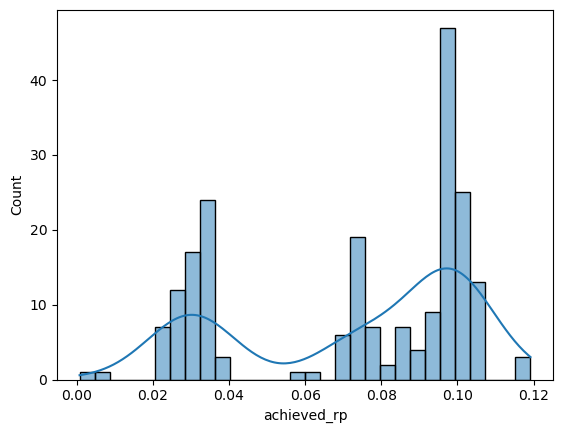

In [98]:
sns.histplot(x="achieved_rp", data=Solar_type_2, bins=30, kde=True)

In [99]:
Covariates_2 = Covariates[Covariates.municipality_type==2]
Covariates_2.head()

,population,yes_votes_for_climate_and_innovation_act,no_votes_for_climate_and_innovation_act,age_group_0_to_19,age_group_20_to_64,age_group_65_and_older,number_of_private_households,housing_and_infrastructure_area_percentage,total_employment,employment_in_primary_sector,...,region_alpes,region_black_forest_or_jura_souabe,region_jura,region_middle_land_or_rhein,region_non_mountainous,language_french,language_german,language_italian,language_romansh,municipality_type
360,-0.310934,1.582823,-1.582823,-0.997272,1.757549,-0.506558,10.059940,-0.150891,0.000000,5.149708,...,0,0,1,0,0,0,1,0,0,2
361,-0.308616,-1.443677,1.443677,-0.641863,0.480416,0.142536,4.391851,-0.150811,-0.179291,3.424441,...,0,0,1,0,0,0,1,0,0,2
364,-0.311009,-1.399170,1.399170,1.703831,-3.951987,1.548906,12.283718,-0.150946,0.000000,5.149708,...,0,0,1,0,0,0,1,0,0,2
477,-0.310111,-3.131534,3.131534,-5.386996,1.801525,2.802237,8.673283,-0.150409,-0.178785,1.027480,...,0,0,0,0,1,0,1,0,0,2
495,-0.251494,-1.189968,1.189968,1.868697,-0.461366,-1.089838,-0.075553,-0.145491,-0.165187,1.254788,...,1,0,0,0,0,0,1,0,0,2


In [100]:
df_2= Covariates_2.copy()
df_2["achieved_rp"]=Solar_type_2['achieved_rp']

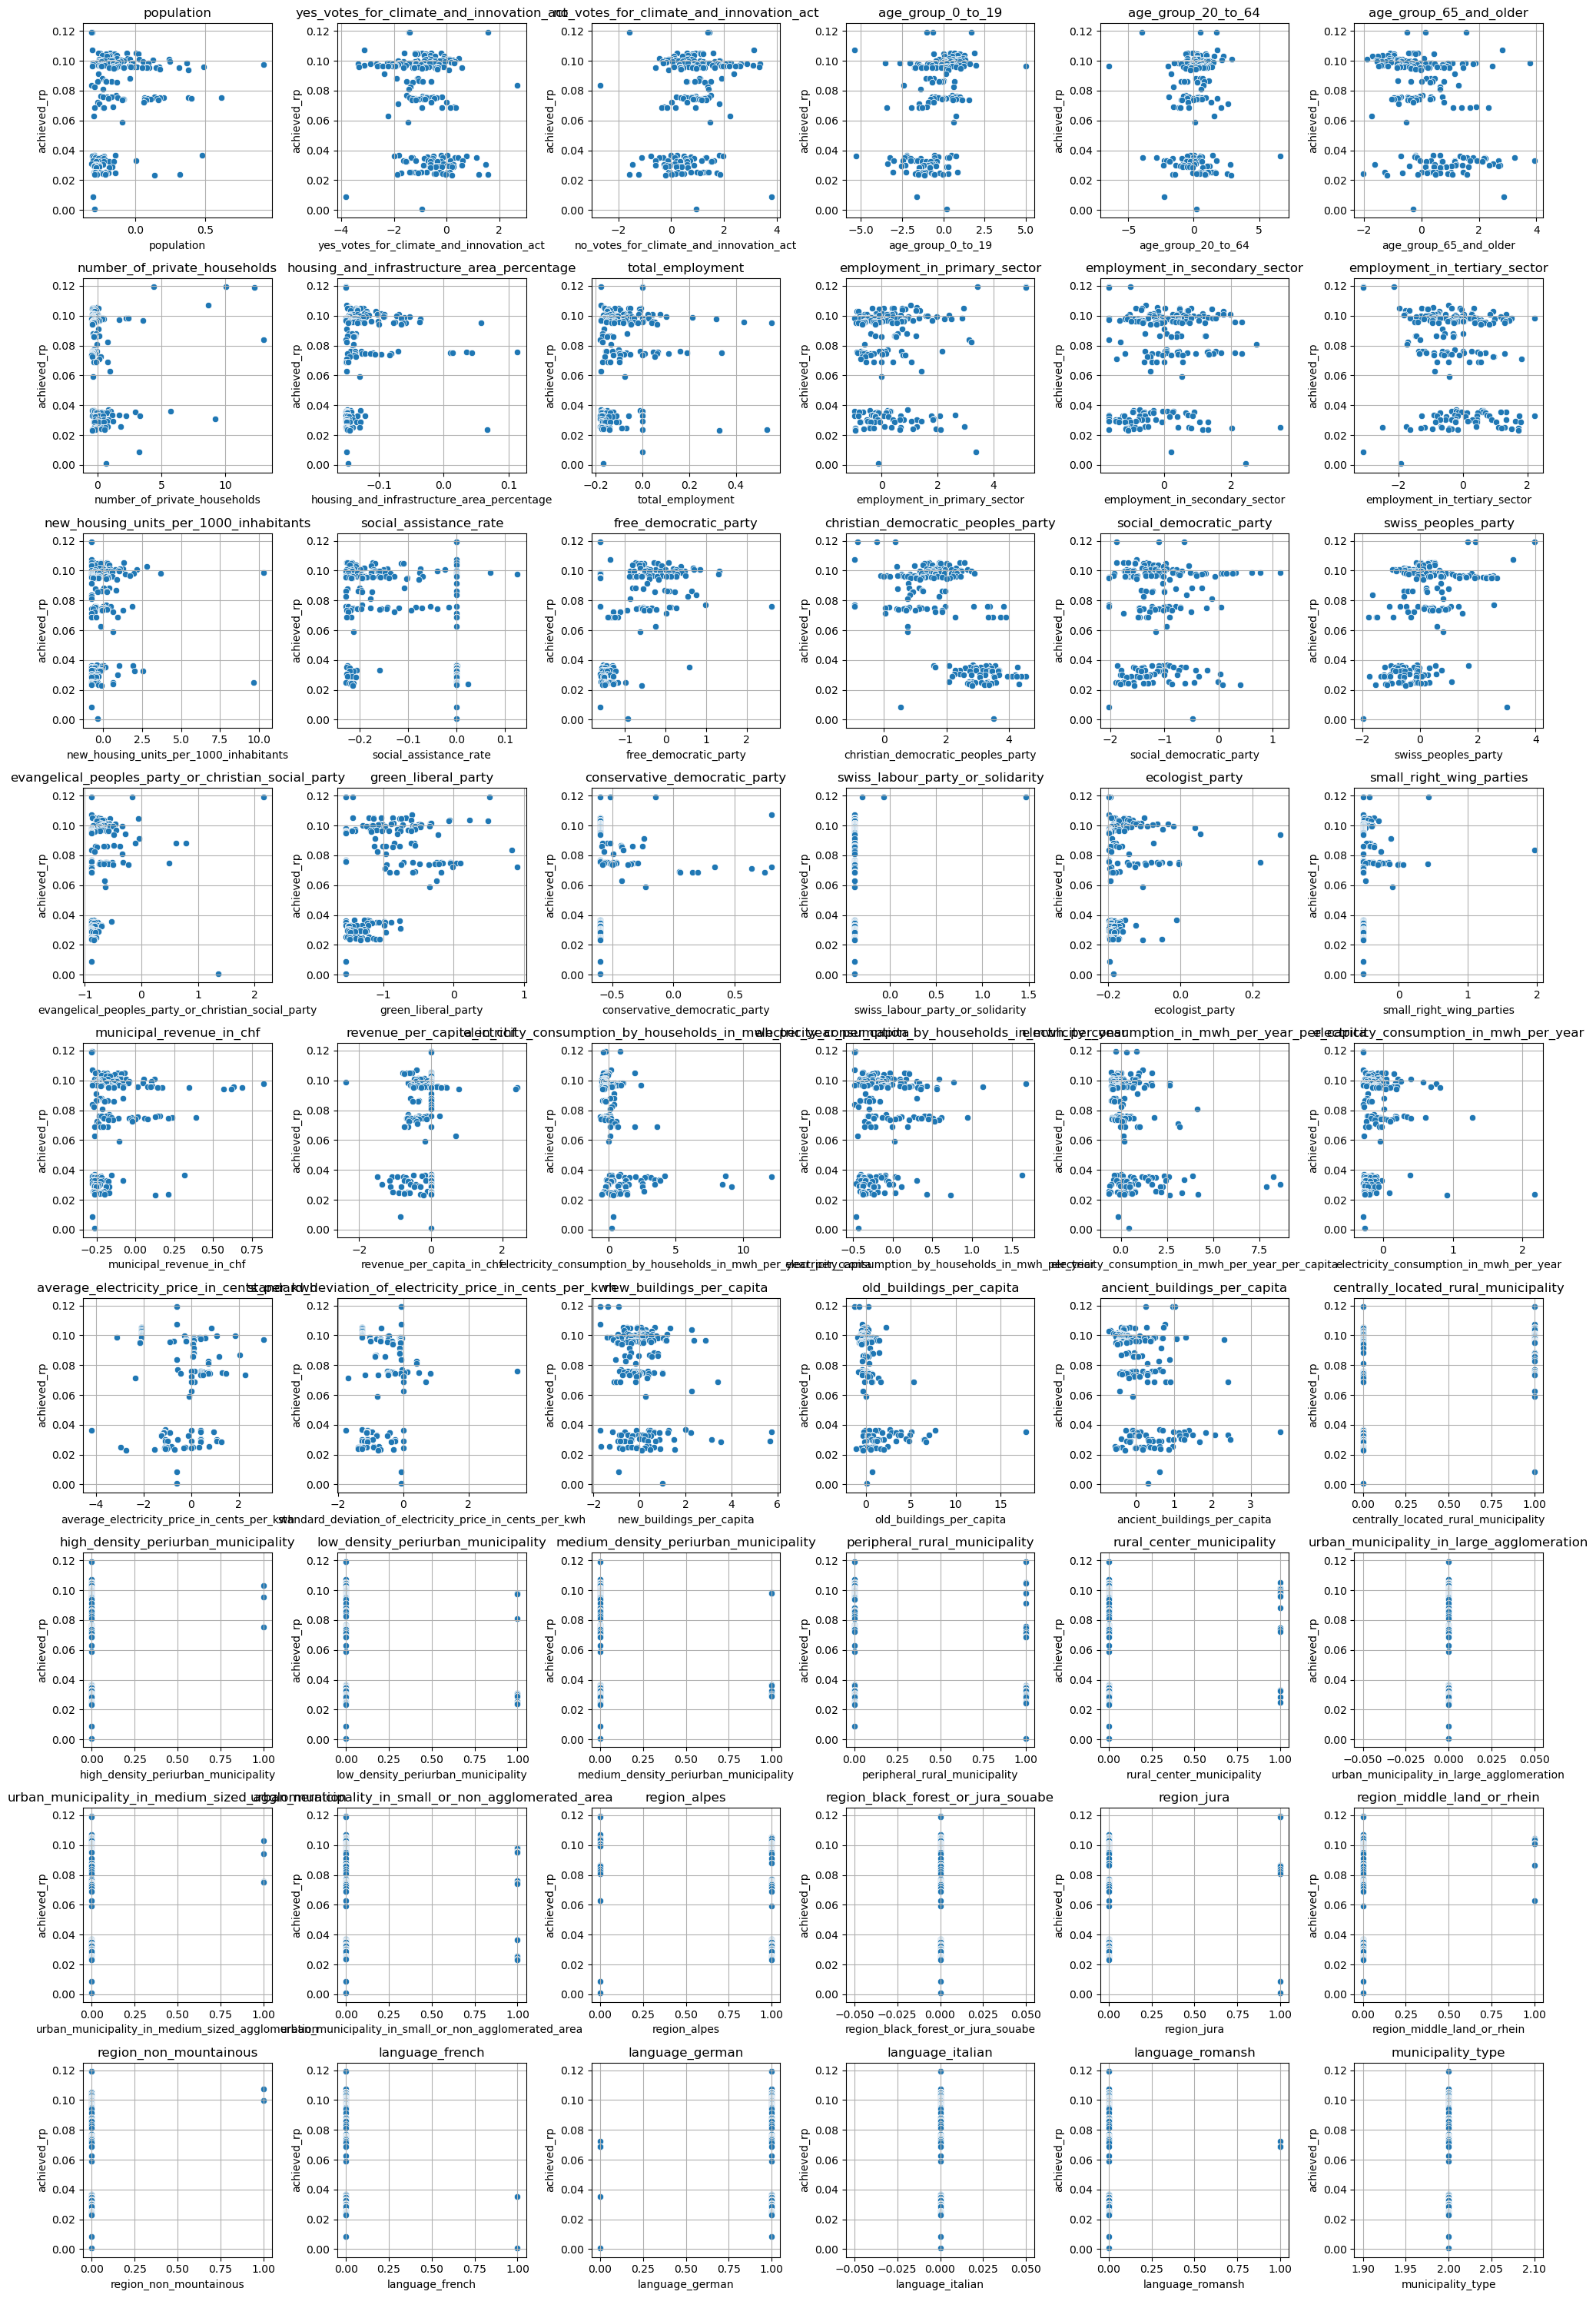

In [101]:
# Create subplots with 9 rows and 6 columns
fig, axes = plt.subplots(9, 6, figsize=(20, 30))  # Adjust size as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over columns and plot scatterplots
for i, col in enumerate(df_2.columns.drop("achieved_rp")):
    if pd.api.types.is_numeric_dtype(df_2[col]):  # Check for numeric data
        sns.scatterplot(x=col, y="achieved_rp", data=df_2, ax=axes[i])
        axes[i].set_title(col)
        axes[i].grid()
    else:
        axes[i].axis('off')  # Turn off unused subplots

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()